Modeling Pipeline In this section, we build a logistic regression model using key indicators from a user questionnaire and menstrual cycle information. We evaluate the model with relevant metrics and visualize both performance and feature importance.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# Step 1: 🔧 Generate Synthetic Dataset

In [2]:
def generate_sample_data(num_samples=100):
    data = []
    for _ in range(num_samples):
        answers = [random.randint(0, 1) for _ in range(10)]
        days_since_last = random.randint(15, 45)
        cycle_length = random.choice([26, 28, 30, 32])
        pregnancy_score = sum(answers) + (days_since_last - cycle_length > 5) * 3
        pregnant = 1 if pregnancy_score >= 8 else 0
        data.append(answers + [days_since_last, cycle_length, pregnant])

    columns = [f"Q{i+1}" for i in range(10)] + ["days_since_last", "cycle_length", "pregnant"]
    return pd.DataFrame(data, columns=columns)

df = generate_sample_data(200)  # Use 200 for a more robust example

# Step 2: 📦 Feature/Target Split

In [3]:
X = df.drop("pregnant", axis=1)
y = df["pregnant"]

# Step 3: 🔍 Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: 🔄 Optional Feature Scaling

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 5: 🏗️ Model Initialization & Training

In [7]:
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

# Step 6: 🔎 Evaluation

In [8]:
y_pred = model.predict(X_test_scaled)

print("\n📊 Evaluation Metrics")
print("-" * 30)
print(f"✅ Accuracy   : {accuracy_score(y_test, y_pred):.2f}")
print(f"🎯 Precision  : {precision_score(y_test, y_pred):.2f}")
print(f"📥 Recall     : {recall_score(y_test, y_pred):.2f}")
print(f"📈 F1 Score   : {f1_score(y_test, y_pred):.2f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Pregnant", "Pregnant"]))


📊 Evaluation Metrics
------------------------------
✅ Accuracy   : 0.85
🎯 Precision  : 0.80
📥 Recall     : 0.67
📈 F1 Score   : 0.73

📄 Classification Report:
              precision    recall  f1-score   support

Not Pregnant       0.87      0.93      0.90        28
    Pregnant       0.80      0.67      0.73        12

    accuracy                           0.85        40
   macro avg       0.83      0.80      0.81        40
weighted avg       0.85      0.85      0.85        40



# Step 7: 📉 Confusion Matrix

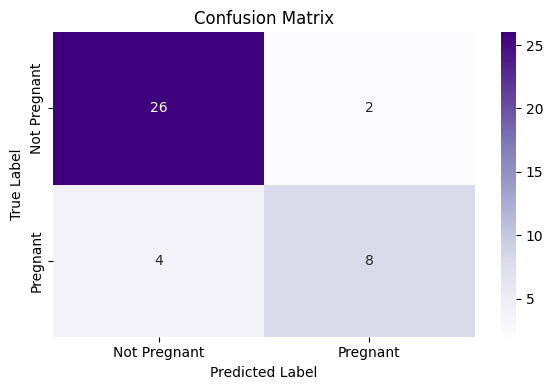

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Not Pregnant", "Pregnant"], yticklabels=["Not Pregnant", "Pregnant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


# Step 8: 📌 Feature Importance (Logistic Coefficients)

<ipython-input-10-2878c3a0556b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=importance_df, palette="coolwarm")
<ipython-input-10-2878c3a0556b>:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


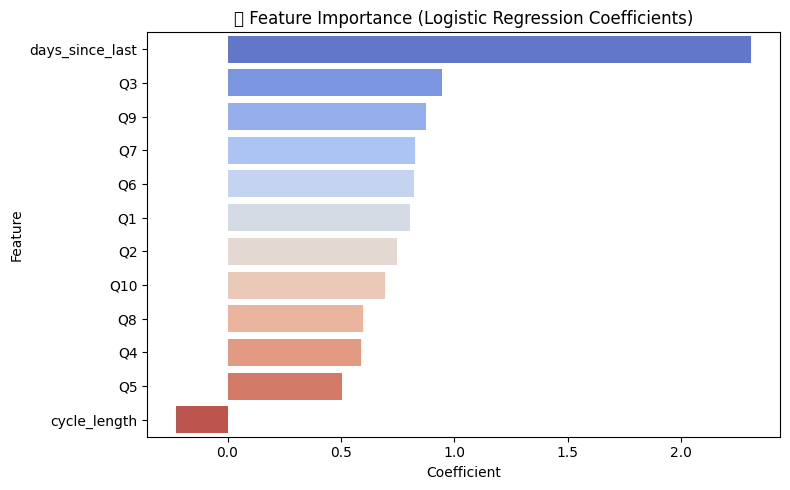

In [10]:
feature_names = X.columns
coefficients = model.coef_[0]

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Coefficient", y="Feature", data=importance_df, palette="coolwarm")
plt.title("🔍 Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()

user input function


In [11]:
def predict_user_input():
    print("\n--- 🧠 Pregnancy Prediction Assistant ---")
    print("Please answer the following questions with 'yes' or 'no':\n")

    questions = [
        "Do you have a missed period?",
        "Have you been experiencing nausea or vomiting?",
        "Do you feel more tired than usual?",
        "Have your breasts been sore or swollen?",
        "Have you been having frequent urination?",
        "Are you feeling more emotional or moody than usual?",
        "Do you have a higher body temperature than normal?",
        "Are you experiencing food cravings or aversions?",
        "Do you have any unusual headaches?",
        "Have you experienced any mild cramping?"
    ]

    user_answers = []
    for q in questions:
        while True:
            ans = input(f"{q} (yes/no): ").strip().lower()
            if ans in ["yes", "no"]:
                user_answers.append(1 if ans == "yes" else 0)
                break
            else:
                print("❌ Invalid input. Please enter 'yes' or 'no'.")

    # Get numerical inputs
    while True:
        try:
            days_since_last = int(input("Enter number of days since your last period: "))
            cycle_length = int(input("Enter your usual cycle length (in days): "))
            break
        except ValueError:
            print("❌ Please enter valid numeric values.")

    # Combine inputs and scale them
    input_features = np.array(user_answers + [days_since_last, cycle_length]).reshape(1, -1)
    input_scaled = scaler.transform(input_features)

    # Make prediction
    prediction = model.predict(input_scaled)[0]
    prob = model.predict_proba(input_scaled)[0][1]

    print("\n🔍 Prediction Result:")
    if prediction == 1:
        print("🩺 **High chance of pregnancy**")
    else:
        print("💡 **Low chance of pregnancy**")

    print(f"📊 Estimated probability: {prob * 100:.1f}%")



predict_user_input()



--- 🧠 Pregnancy Prediction Assistant ---
Please answer the following questions with 'yes' or 'no':

Do you have a missed period? (yes/no): no
Have you been experiencing nausea or vomiting? (yes/no): no
Do you feel more tired than usual? (yes/no): yes
Have your breasts been sore or swollen? (yes/no): yes
Have you been having frequent urination? (yes/no): yes
Are you feeling more emotional or moody than usual? (yes/no): yes
Do you have a higher body temperature than normal? (yes/no): no
Are you experiencing food cravings or aversions? (yes/no): yes
Do you have any unusual headaches? (yes/no): yes
Have you experienced any mild cramping? (yes/no): no
Enter number of days since your last period: 24
Enter your usual cycle length (in days): 31

🔍 Prediction Result:
💡 **Low chance of pregnancy**
📊 Estimated probability: 5.9%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
